### Importing libraries

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading Datasets

In [51]:
df=pd.read_csv(r'file:///C:\Users\SHAKIR\OneDrive\Desktop\DATASET\companies.csv')

In [53]:
df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,05-09-2010,18-09-2013,5.0,17.0,initial-importer,25-05-2007 06:51,13-04-2013 03:29,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,31-05-2007 21:11,23-05-2008 23:23,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,01-02-2003,23-09-2011,4.0,12.0,initial-importer,06-08-2007 23:52,04-11-2013 02:09,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,24-08-2008 16:51,06-09-2008 14:19,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,24-08-2008 17:10,06-09-2008 14:19,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [6]:

df.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333330


In [7]:
df.shape

(196553, 44)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

There are so many null values present in our dataset, there are only 9 columns with 0 null values and some of the columns are of completely null values or empty columns, also some of the columns only have few entries. So, going to drop all those unnecessary columns with all the null values and will not required in further analysis

In [10]:
data = df.drop(columns = ['id','entity_type','permalink','region','created_by','Unnamed: 0.1','normalized_name','parent_id','domain','homepage_url','logo_url','logo_width','logo_height','overview','short_description','twitter_username','short_description','description','tag_list','state_code','city','first_investment_at', 'last_investment_at','first_milestone_at','last_milestone_at',  'first_funding_at','last_funding_at','lat','lng'])
data.head()

,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI
0,1,Wetpaint,web,operating,17-10-2005,NaN,USA,NaN,NaN,3.0,39750000.0,5.0,17.0,25-05-2007 06:51,13-04-2013 03:29,15.5
1,10,Flektor,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,6.0,31-05-2007 21:11,23-05-2008 23:23,NaN
2,100,There,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,4.0,12.0,06-08-2007 23:52,04-11-2013 02:09,NaN
3,10000,MYWEBBO,network_hosting,operating,26-07-2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-08-2008 16:51,06-09-2008 14:19,NaN
4,10001,THE Movie Streamer,games_video,operating,26-07-2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-08-2008 17:10,06-09-2008 14:19,NaN


## Dropping the unwanted columns 


'id','Unnamed:0.1','normalized_name','parent_id','domain','homepage_url','logo_url','logo_width','logo_height','overview', 'short_description','twitter_username','description','tag_list','country_code','state_code','city','first_investment_at','last_investment_at','first_milestone_at', 'last_milestone_at','first_funding_at','last_funding_at','lat','lng'

-Dropping all these columns because
-Some columns are empty.
-Unwanted object columns.
-70% of Null values present in the columns.
-Empty columns.
-Unnecessary columns.

In [11]:
data.shape

(196553, 16)

## Dropping null values

In [12]:
data.dropna(subset= ['name','country_code','category_code','founded_at'],inplace = True)
data.shape

(64094, 16)

## Filling the missing values 

Filling the Investment Rounds columns with the median() method, as rounds cannot be in float datatype

In [13]:
data['investment_rounds'] = data['investment_rounds'].fillna(data['investment_rounds'].median())

 Filling the Invested Companies columns with the median() method, as in our dataset the Invested Companies data is in integer so it cannot be in float datatype

In [14]:
data['invested_companies'].value_counts()

1.0      460
2.0      104
3.0       56
4.0       26
5.0       23
6.0       14
7.0       13
14.0       6
16.0       5
9.0        4
8.0        4
11.0       2
10.0       2
29.0       2
38.0       2
26.0       2
18.0       2
24.0       2
21.0       2
20.0       2
57.0       1
68.0       1
44.0       1
124.0      1
12.0       1
39.0       1
79.0       1
268.0      1
30.0       1
73.0       1
459.0      1
33.0       1
13.0       1
47.0       1
17.0       1
51.0       1
Name: invested_companies, dtype: int64

In [15]:
data['invested_companies'] = data['invested_companies'].fillna(data['invested_companies'].median())

Filling the Funding Rounds columns with the median() method, as in our dataset the Funding Rounds data is in integer so it cannot be in float datatype.

In [16]:
data['funding_rounds'].value_counts()

1.0     13378
2.0      4964
3.0      2367
4.0      1100
5.0       561
6.0       239
7.0       136
8.0        62
9.0        42
10.0       22
11.0       10
13.0        4
12.0        3
15.0        2
14.0        1
Name: funding_rounds, dtype: int64

In [17]:
data['funding_rounds'] = data['funding_rounds'].fillna(data['funding_rounds'].median())

Filling the Funding Total USD columns with the mean() method, as in Funding Total USD is an int type and can be float data.

In [18]:
data['funding_total_usd'] = data['funding_total_usd'].fillna(data['funding_total_usd'].mean())

Filling the Milestones columns with the mode() method.

In [19]:
data['milestones'].value_counts()

1.0    24691
2.0     7478
3.0     2478
4.0      458
5.0      139
6.0       45
7.0        7
8.0        3
9.0        1
Name: milestones, dtype: int64

In [20]:

data['milestones'] = data['milestones'].fillna(data['milestones'].mode()[0])

Filling the Relationships columns with the mean() method.

In [21]:
data['relationships'].value_counts()

1.0      13943
2.0      10982
3.0       7221
4.0       4384
5.0       2723
         ...  
183.0        1
155.0        1
122.0        1
387.0        1
67.0         1
Name: relationships, Length: 137, dtype: int64

In [22]:

data['relationships'] = data['relationships'].fillna(data['relationships'].mean())

Filling the ROI columns with the mean() method

In [23]:
data['ROI'].value_counts()

10.000000    6
15.000000    4
16.666667    3
3.333333     3
5.000000     3
            ..
57.777778    1
0.232143     1
7.788945     1
0.675219     1
24.137931    1
Name: ROI, Length: 504, dtype: int64

In [24]:
data['ROI'] = data['ROI'].fillna(data['ROI'].mean())

# Datetime columns

Converting the dtype to datetime

In [25]:
data['founded_at'] = pd.to_datetime(data['founded_at'])
data['founded_at'] = data['founded_at'].dt.year

Filling the null values with mode()

In [26]:
data['founded_at'] = data['founded_at'].fillna(data['founded_at'].mode()[0])

In [27]:
data['closed_at'] = pd.to_datetime(data['closed_at'])
data['closed_at'] = data['closed_at'].dt.year

Filling the closed_at column with some condition.

If Status is operating or ipo, fillna with 2021 and
If Status is accquired or closed, fillna with mode()

In [28]:
data['closed_at'].mode()[0]

2012.0

In [29]:
for i in data['status']:
    if (i == 'operating' or 'ipo'):
        data['closed_at'].fillna(2021,inplace = True)
    elif (i == 'accquired' or 'closed'):
        data['closed_at'].fillna(2012, inplace = True)

### Updating the date columns and taking only year from it 

In [30]:
created = []
for i in data['created_at']:
    created.append(i.split('-')[0])
data['created_at']= created

In [31]:
created = []
for i in data['updated_at']:
    created.append(int(i.split('-')[0]))
data['updated_at']= created

### Adding new updated columns 

Adding Companies Age(in years), by subtracting founded at from closed at columns

In [32]:
data['companies_age'] = data['closed_at'] - data['founded_at']

After substraction, some of the entries will be negative value, so will remove negative value

In [33]:
index = np.where(data['companies_age'] < 0)
data['companies_age'] = data['companies_age'].drop(data['companies_age'].index[index])

In [34]:
data['companies_age'] = data['companies_age'].fillna(0)

In [35]:
data.head()

,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
0,1,Wetpaint,web,operating,2005,2021.0,USA,1.0,1.0,3.0,3.975000e+07,5.0,17.00000,25,13,15.50000,16.0
5,10002,Synergie Media,advertising,operating,2007,2021.0,MAR,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,24,6,14.41045,14.0
6,10003,Green Basti Ecosystems,cleantech,operating,2008,2021.0,IND,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,24,22,14.41045,13.0
12,10009,dimension5 labs,advertising,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,24,21,14.41045,13.0
13,1001,FriendFeed,web,acquired,2007,2021.0,USA,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,01,13,9.50000,14.0


In [36]:
data.isna().sum()

entity_id             0
name                  0
category_code         0
status                0
founded_at            0
closed_at             0
country_code          0
investment_rounds     0
invested_companies    0
funding_rounds        0
funding_total_usd     0
milestones            0
relationships         0
created_at            0
updated_at            0
ROI                   0
companies_age         0
dtype: int64

In [37]:
data.reset_index(inplace = True)

In [38]:
data.shape

(64094, 18)

## Encoding 

Assuming Categorical columns are to be encoded

### Encoding 

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['encoded_column'] = label_encoder.fit_transform(data['status'])

In [40]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['status'])

# Display the mapping between original values and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'acquired': 0, 'closed': 1, 'ipo': 2, 'operating': 3}


### Data Labelling 

Assuming the target variable is 'status' with values 'Operating', 'IPO', 'Acquired', 'Closed'
 Map the labels to numerical values



In [41]:
label_mapping = {'acquired': 0, 'closed': 1, 'ipo': 2, 'operating': 3}
df['label'] = df['status'].map(label_mapping)
df['label']

0         3
1         0
2         0
3         3
4         3
         ..
196548    3
196549    3
196550    3
196551    3
196552    3
Name: label, Length: 196553, dtype: int64

In [42]:
aggregated_group = data.groupby('status')[['milestones', 'relationships']].mean()
print(aggregated_group)

           milestones  relationships
status                              
acquired     1.589231       6.746131
closed       1.324739       3.563485
ipo          2.135621      33.906004
operating    1.192190       3.992358


In [43]:
pivot_table = data.pivot_table(index='status', columns='category_code', values='investment_rounds', aggfunc='mean')
print(pivot_table)

category_code  advertising  analytics  automotive   biotech  cleantech  \
status                                                                   
acquired          1.008929        1.0         1.0  1.008163   1.000000   
closed            1.000000        1.0         1.0  1.000000   1.000000   
ipo               1.150000        1.0         1.0  1.550000   1.259259   
operating         1.002306        1.0         1.0  1.010309   1.007964   

category_code  consulting  design  ecommerce  education  enterprise  ...  \
status                                                               ...   
acquired         1.000000     1.0   1.018519   1.000000    1.008163  ...   
closed           1.000000     1.0   1.000000   1.000000    1.000000  ...   
ipo              1.166667     NaN   2.421053   1.000000    2.781250  ...   
operating        1.024781     1.0   1.001682   1.003416    1.015536  ...   

category_code  real_estate    search  security  semiconductor    social  \
status                 

In [44]:
avg_software_for_ipo = pivot_table.loc['ipo', 'software']
print("Average value of software for IPO companies:", avg_software_for_ipo)

Average value of software for IPO companies: 1.8666666666666667


In [45]:
lowest_avg_category_acquired = pivot_table.loc['acquired'].idxmin()
print("Category with average value for acquired companies:", lowest_avg_category_acquired)

Category with average value for acquired companies: analytics


In [46]:
total_avg_value_operating = pivot_table.loc['operating'].mean()
print("Total average value of all categories for operating companies:", total_avg_value_operating)

Total average value of all categories for operating companies: 1.0550325996182535


In [47]:
total_companies_software = pivot_table['software'].sum()
print("Total number of companies in the 'software' category:", total_companies_software)

Total number of companies in the 'software' category: 4.886160265605406


# EDA

In [48]:
def plot(x,y,data):
    plt.figure(figsize=(10,10))
    plt.scatter(x,y,data=data)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

Scatterpot between status and category_code


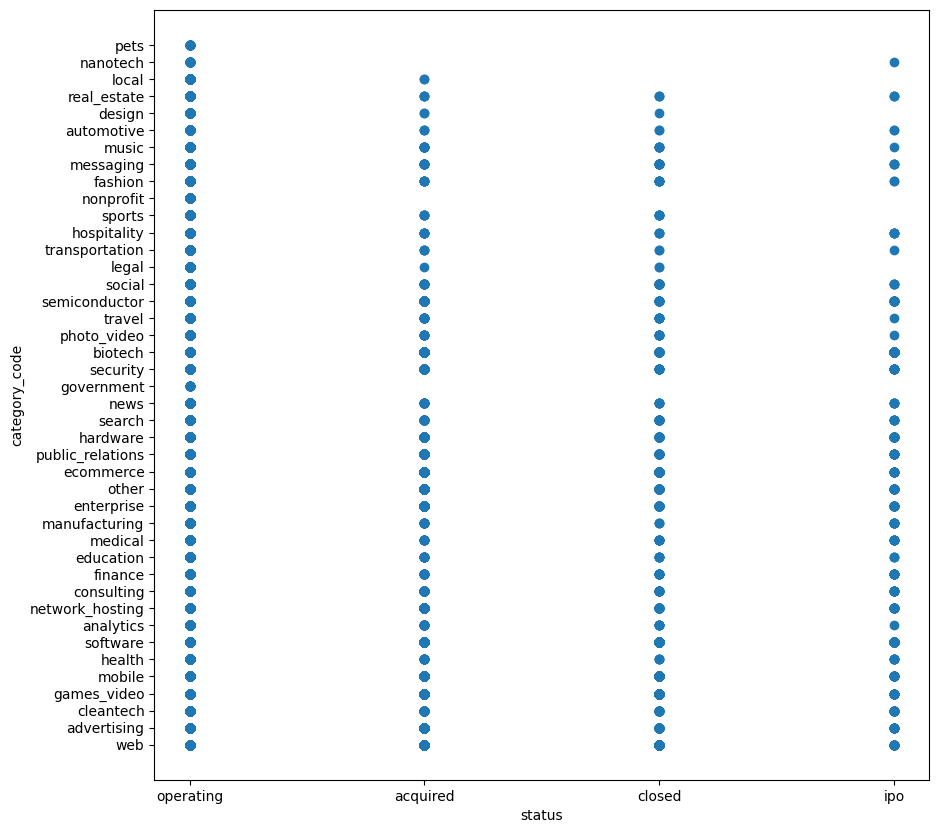

In [54]:
plot('status','category_code',data=data)

There are each category of company present in status of company

Equally distrubuted between status

Scatterpot between funding_total_usd and category_code


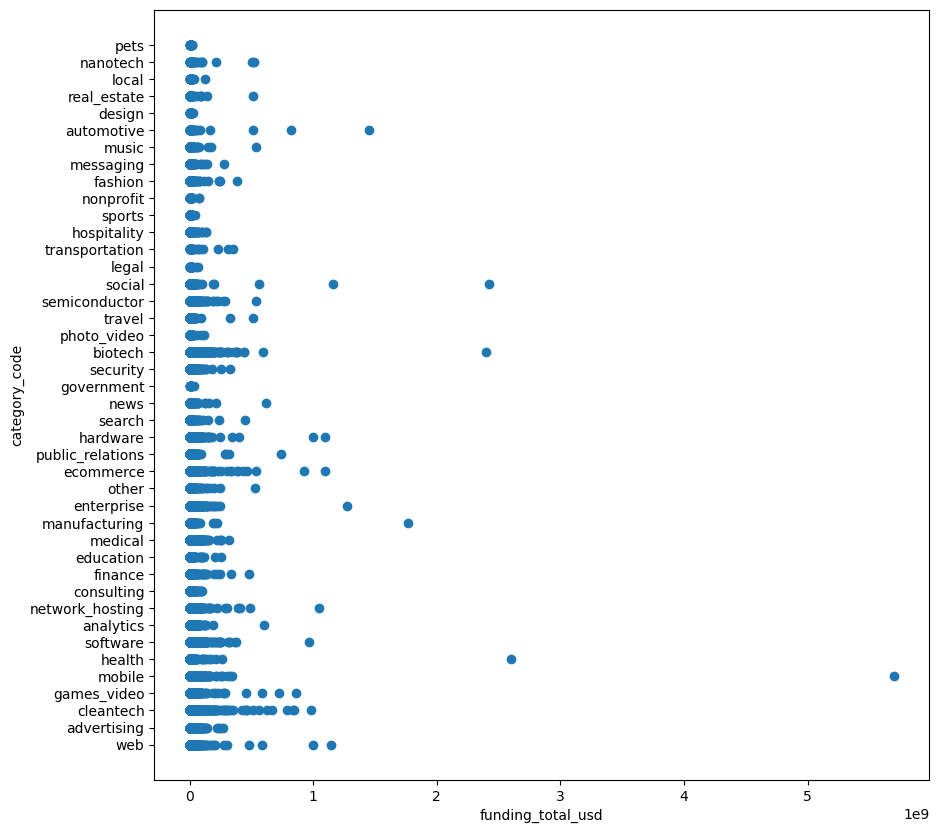

In [56]:
plot(x='funding_total_usd',y='category_code',data=data)

Mobile sector are having large amount of funding.

Then, Health,Social and biotech are next large amount of funding.

Manufacturing is the next in terms of fundings.

And the design category is funding the smallest amount among all.

Scatterpot between investment_rounds and category_code


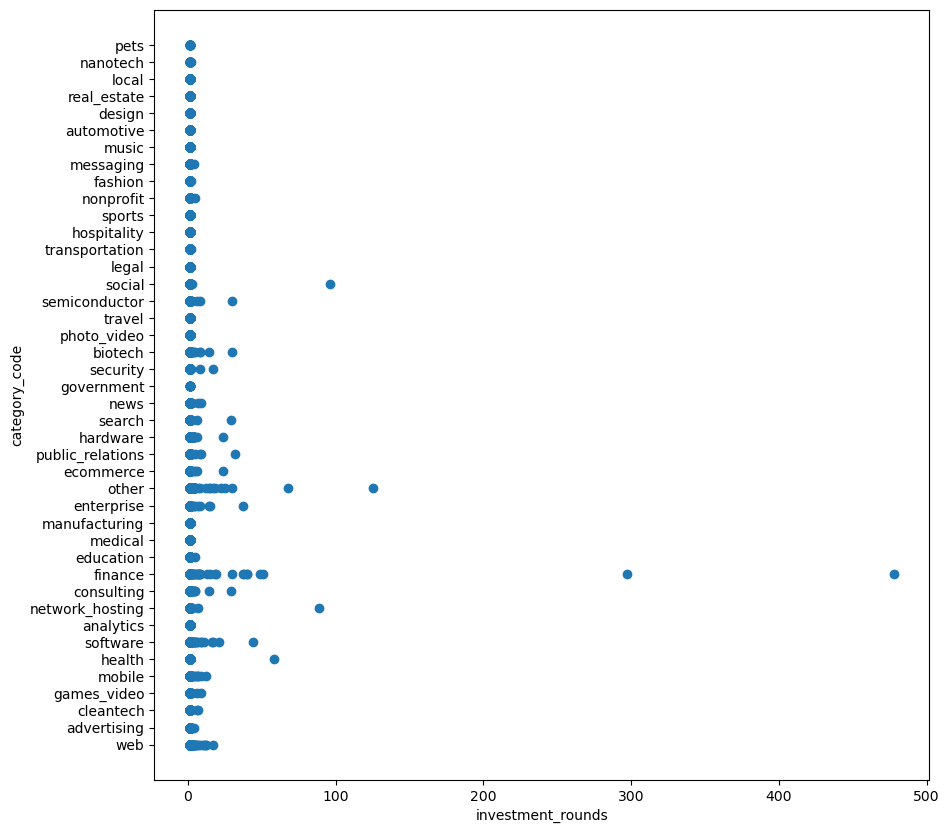

In [57]:
plot(x='investment_rounds',y='category_code',data=data)

Finance sector is the highest in investing rounds

Other category is the top 2 in investing rounds

Next are, Social and netwrok hosting and are on the same line in investing rounds

Most of the category lies on the same rounds and its hard to analysis which one is having lowest investing rounds

Scatterpot between funding_rounds and category_code


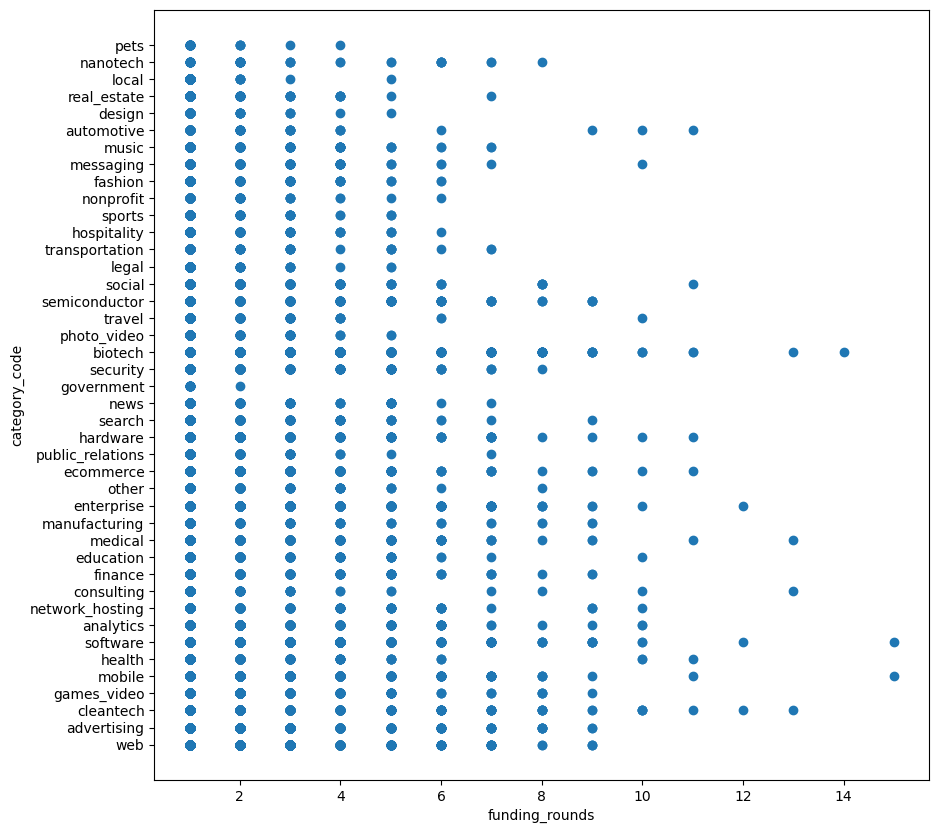

In [58]:
plot(x='funding_rounds',y='category_code',data=data)

### Scatterplot between Funding Rounds and category code.

Mobile and software are the top category in funding rounds.

Biotech is on the 2nd in funding rounds.

Medical is the next in funding rounds.

And Government and Local categories are the lowest in the funding rounds.

Scatterpot between relationships and category_code


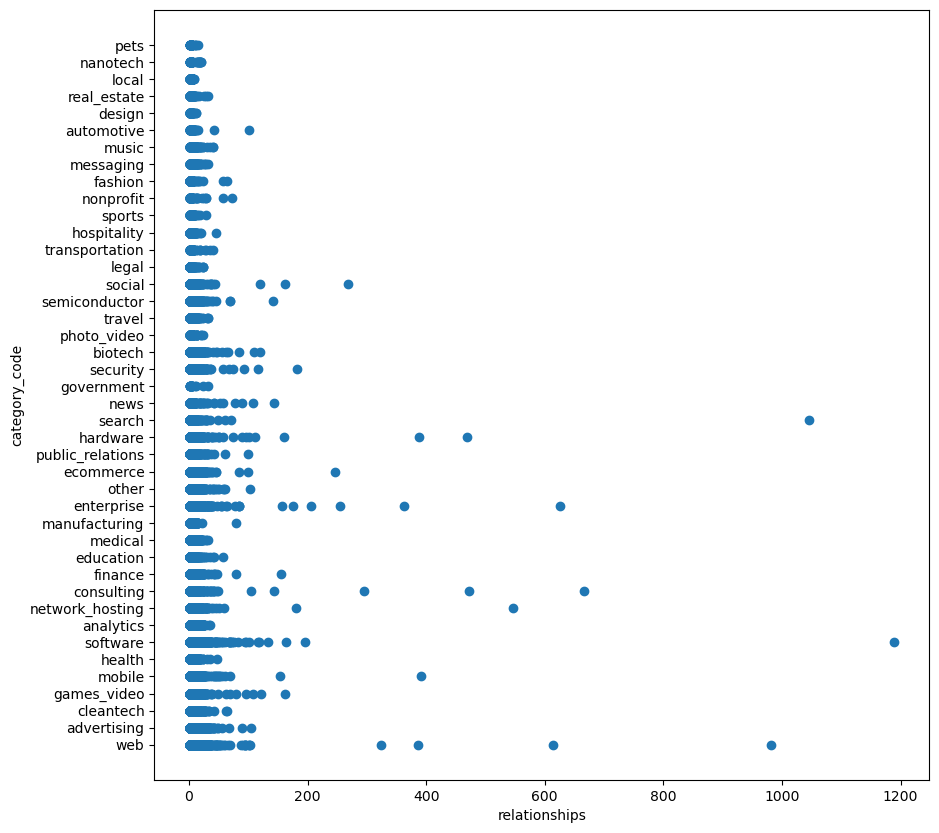

In [59]:
plot(x='relationships',y='category_code',data=data)

### Scatterplot between Relationship and category code

Software category has the stronges relationship.

Search and web are on the same scale in terms of relationship

Consulting category is the next in relationship.

Local category is having the weakest relationship

Scatterpot between invested_companies and category_code


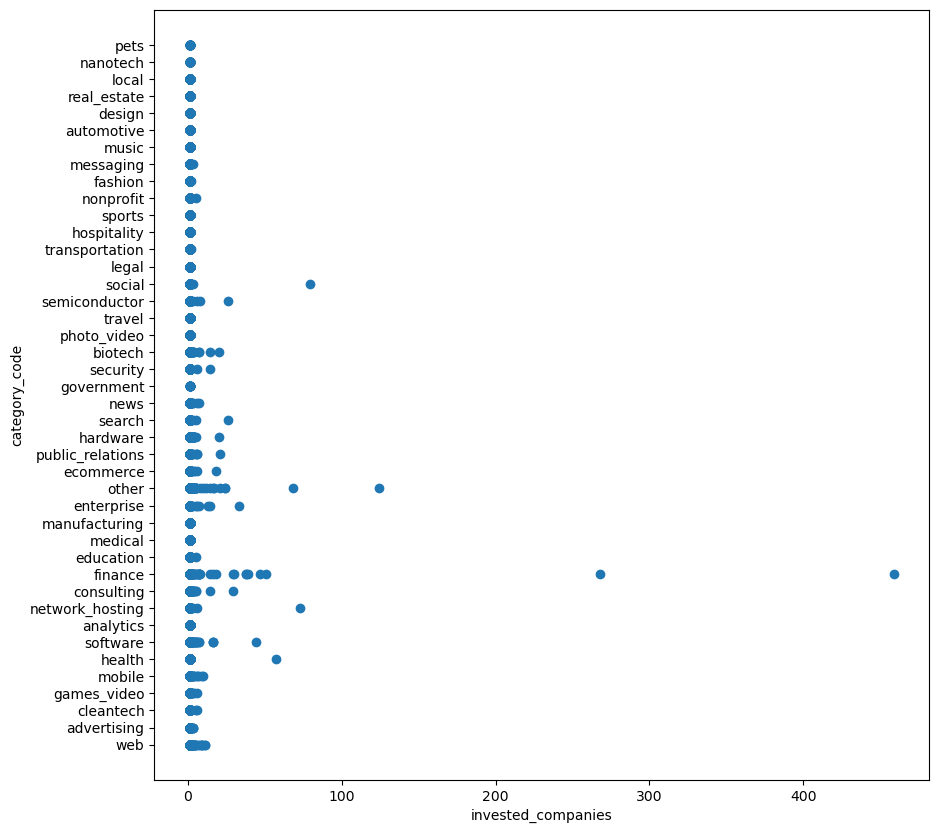

In [60]:
plot(x='invested_companies',y='category_code',data=data)

#### Scatterplot between Invested companies and category code.

Finance category has the most of the invested companies.

Other are the another category having the most of the invested companies

Network hosting and Social are the top 3rd in invested companies.

And, there are many category having the lowest invested companies, like, Pets, Nanotech, Local, Real Estate and many more

Scatterpot between milestones and category_code


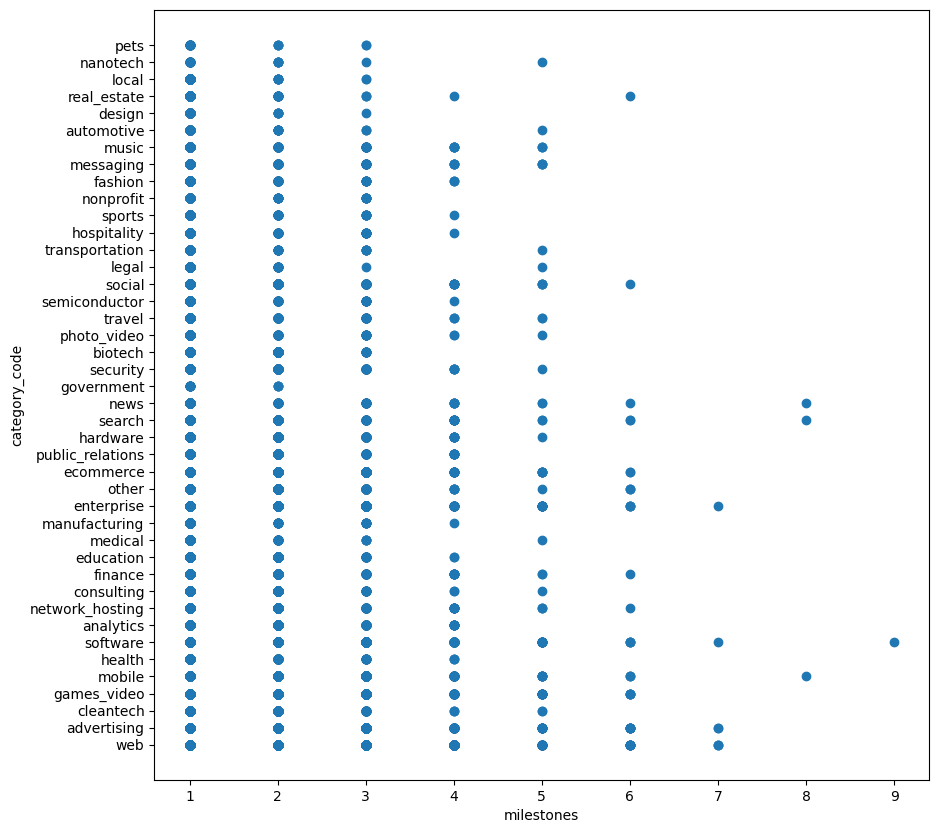

In [61]:
plot(x='milestones',y='category_code',data=data)

#### Scatterplot between Milestones and category code

Top Categories in terms of Milestones are: Software,Mobile, Search, News  all lies on the same scale.

Web, Advertising, Enterprise are the next and on the same scale.

Lowest categories in terms of Milestones:
Government.
Pets, Local, Non-Profit are on the same scale.

In [62]:
def splot(x,y,data):
    plt.scatter(x,y,data=data)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

Scatterpot between status and funding_total_usd


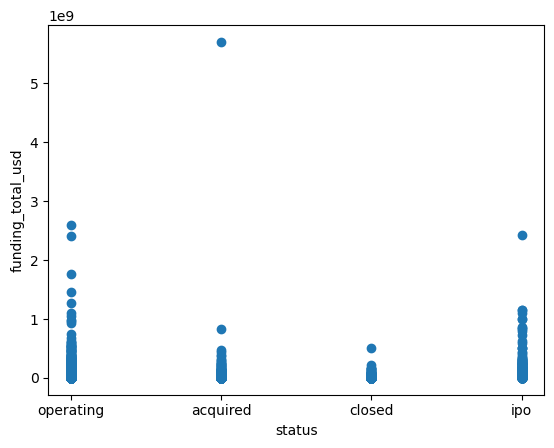

In [63]:
splot(y='funding_total_usd',x='status',data=data)

### Scatterplot between Total Funding and Status

Top to down in Total funding: Acquired, Operating, IPO,Closed

Scatterpot between status and investment_rounds


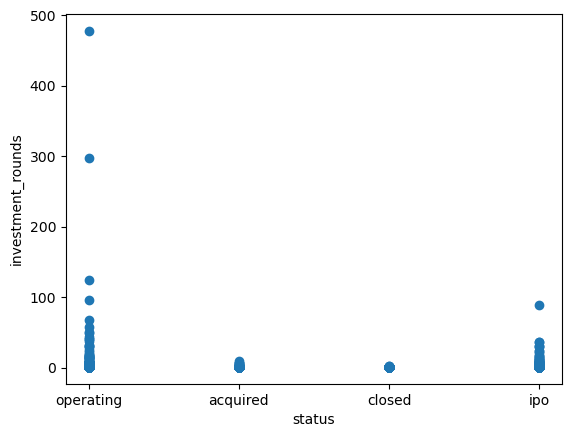

In [64]:
splot(y ='investment_rounds',x ='status',data=data)

### Scatterplot between Investment Rounds and Status. 

Top to down in Investment Rounds:Operating, IPO, Acquired, Closed

Scatterpot between status and funding_rounds


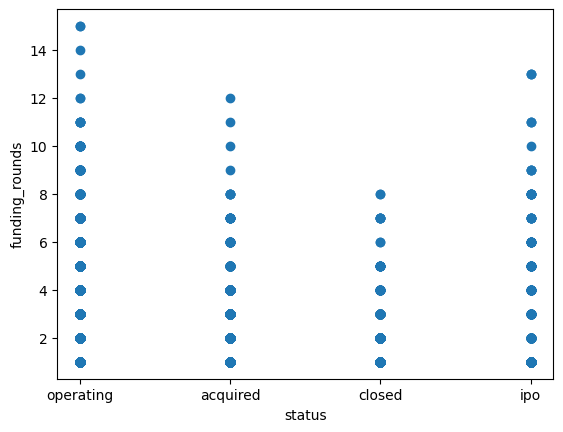

In [65]:
splot(y ='funding_rounds',x ='status',data=data)

### Scatterplot between Funding Rounds and Status

Top to down in Investment Rounds:Operating, IPO, Acquired, Closed

Scatterpot between status and invested_companies


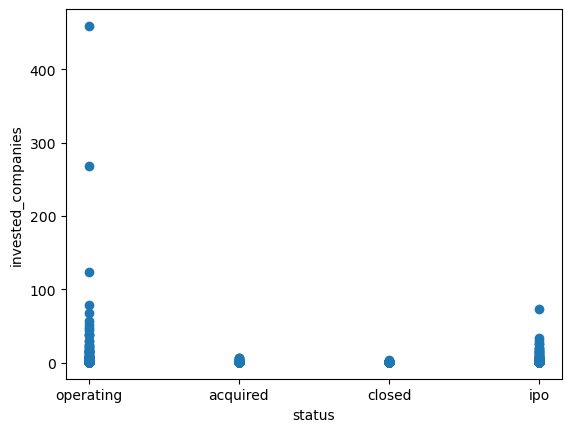

In [66]:
splot(y ='invested_companies',x ='status',data=data)

####  Scatterplot between Invested Companies and Status.

Scatterpot between status and relationships


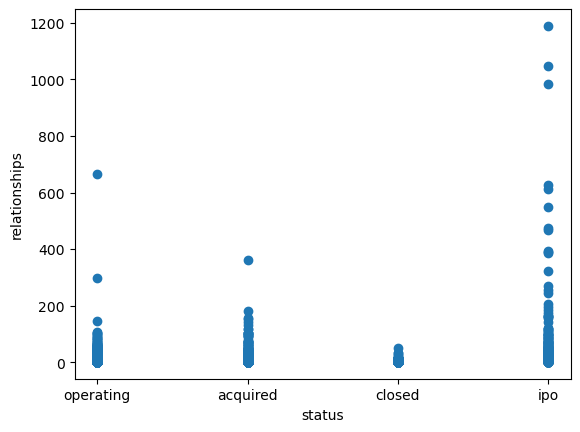

In [67]:
splot(y ='relationships',x ='status',data=data)

### Scatterplot between Relationship and Status.

Top to down in milestone : IPO,Operating, Acquired, Closed

Scatterpot between status and milestones


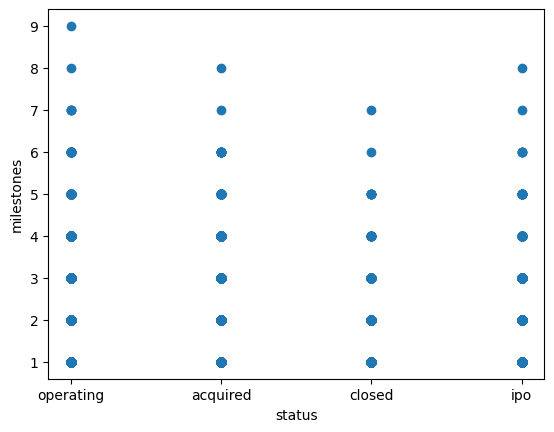

In [71]:
splot(y ='milestones',x ='status',data=data)

###  Scatterplot between Milestones and Status.

Top to down in milestone : Operating, IPO and Acquired, Closed

Scatterpot between status and ROI


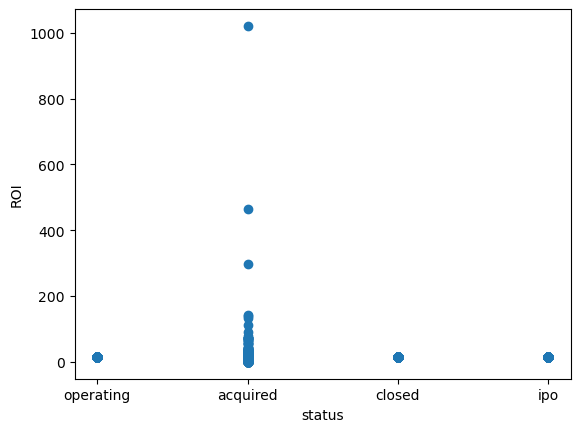

In [72]:
splot(y ='ROI',x ='status',data=data)

### Scatterplot between ROI and Status. 

Top to down in ROI:
Acquired,
Operating, Closed & IPO

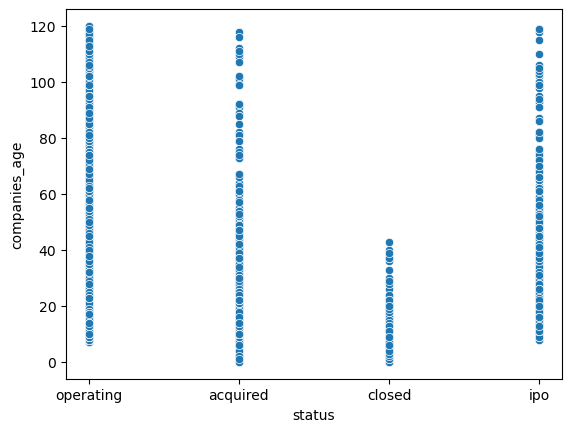

In [73]:
sns.scatterplot(y = 'companies_age',x='status',data=data)
plt.show()

### Scatterplot between Companies age and Status. 

Top to down in Companies age:Operating, Acquired & IPO,Closed.

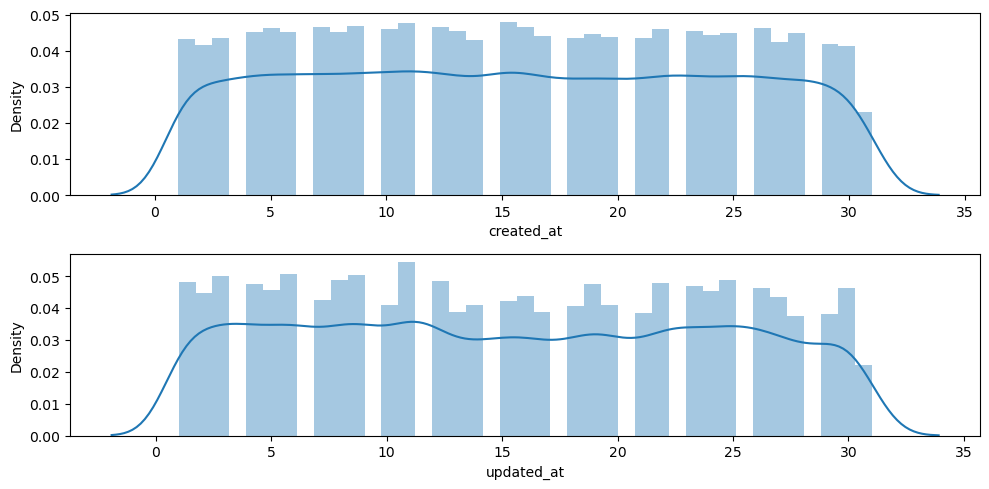

In [75]:
plt.figure(figsize=(10,5))
plotnumber = 1

for column in data[['created_at','updated_at']]:
    if plotnumber <= 2:
        ax = plt.subplot(2,1,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 10)
    
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='status', ylabel='Count'>

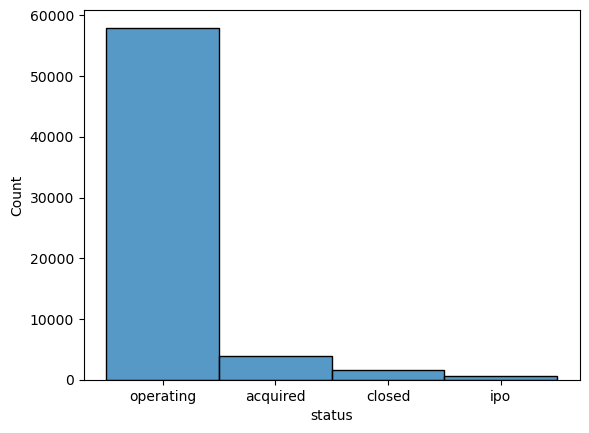

In [77]:
sns.histplot(data.status,bins=10)

####  Histplot of our target columns i.e. status 

<AxesSubplot:xlabel='category_code', ylabel='Count'>

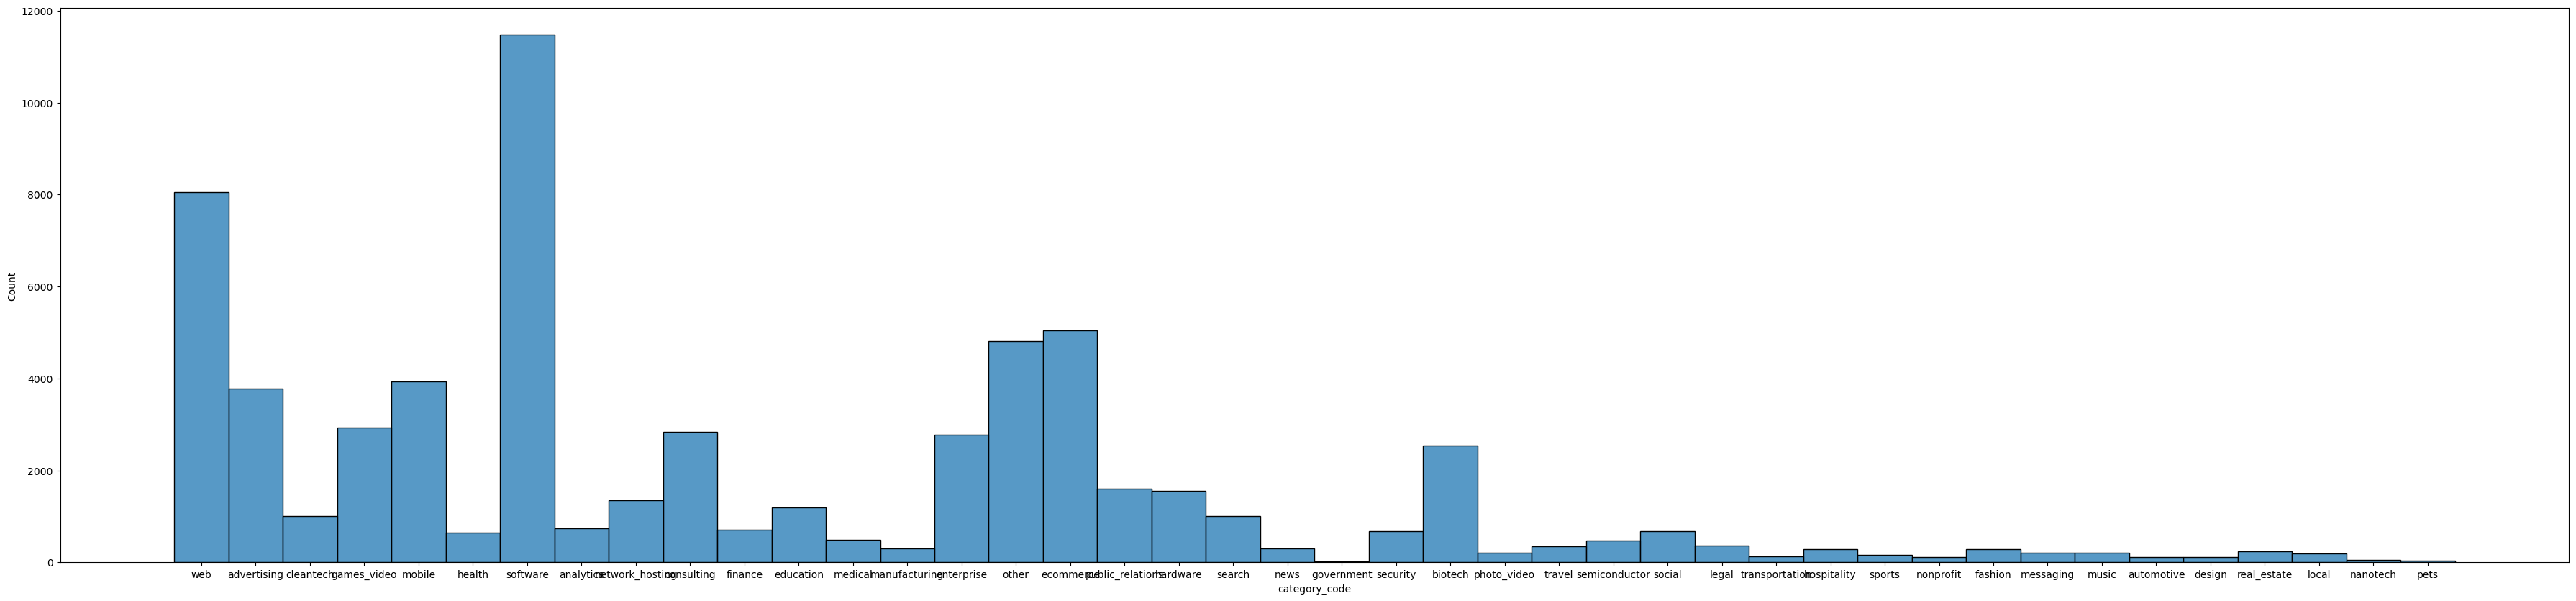

In [78]:
plt.figure(figsize= (45,10))
sns.histplot(data.category_code)

#### Top 10 category in category_code are: 

Software,Web,Ecommerce, other, Mobile, Advertising, Games_video, Consulting, Enterprise, Biotech.

####  Histplot for the category code.

<AxesSubplot:xlabel='country_code', ylabel='Count'>

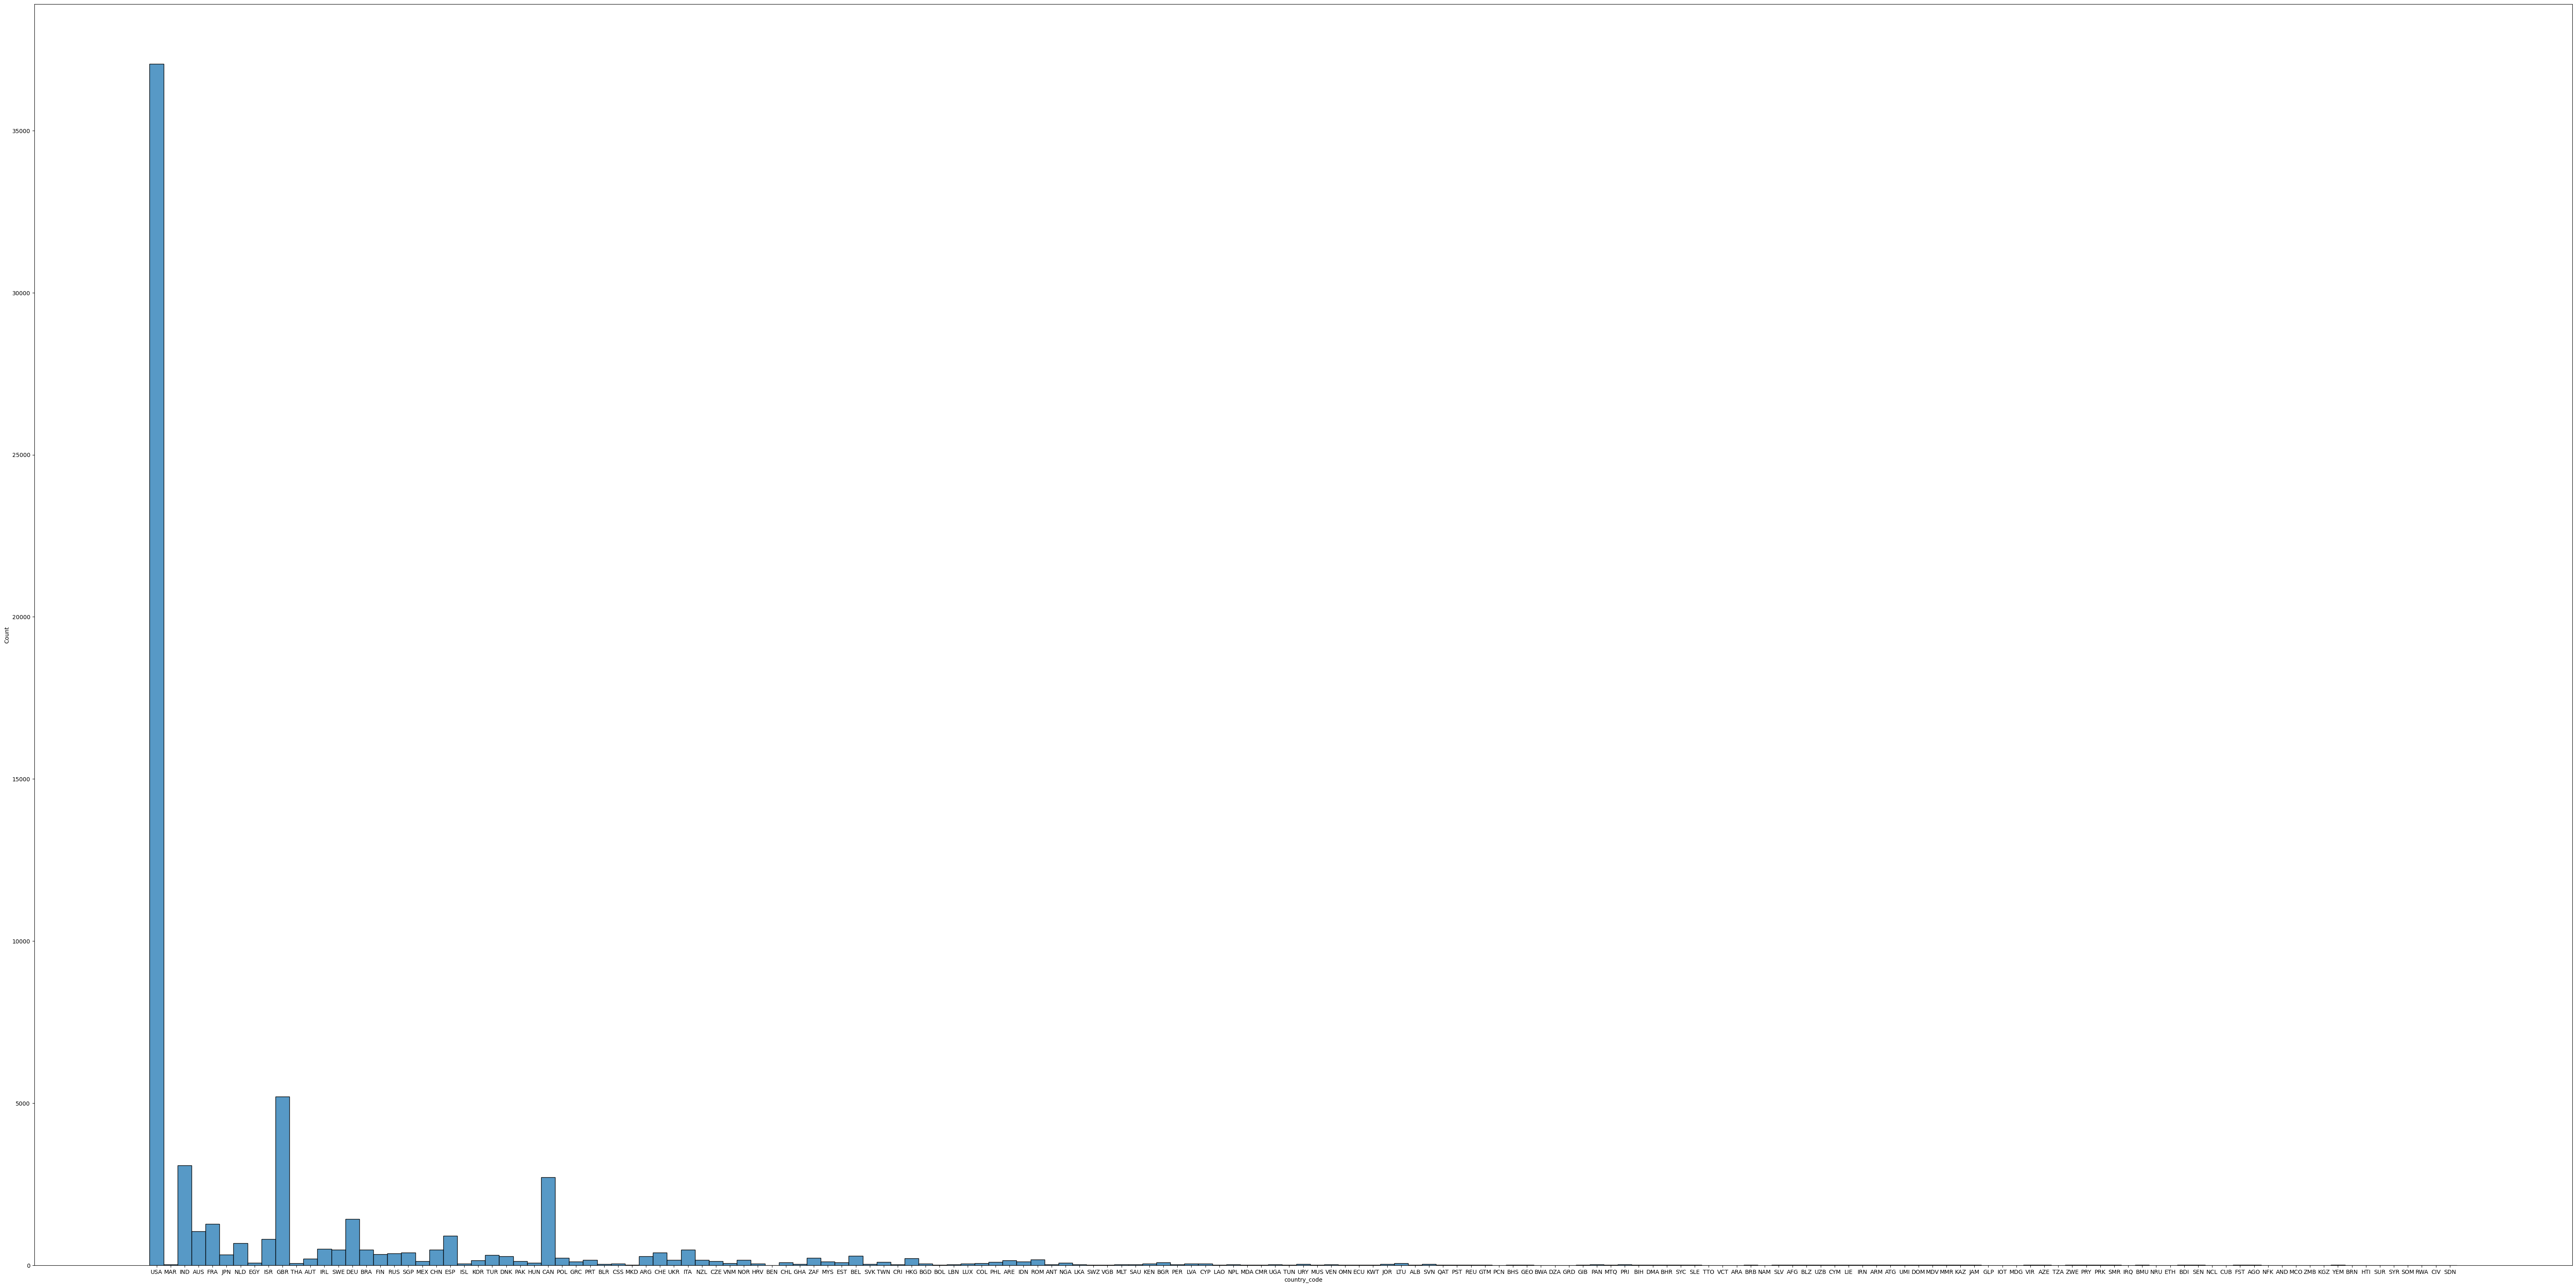

In [81]:
plt.figure(figsize= (80,40))
sns.histplot(data['country_code'])

#### Top 10 category of Country_code columns 

USA, GBR, IND,CAN, DEU, FRA, AUS, ESP, ISR, NLD

#### Correlation

In [82]:
df_corr = data.corr().abs()

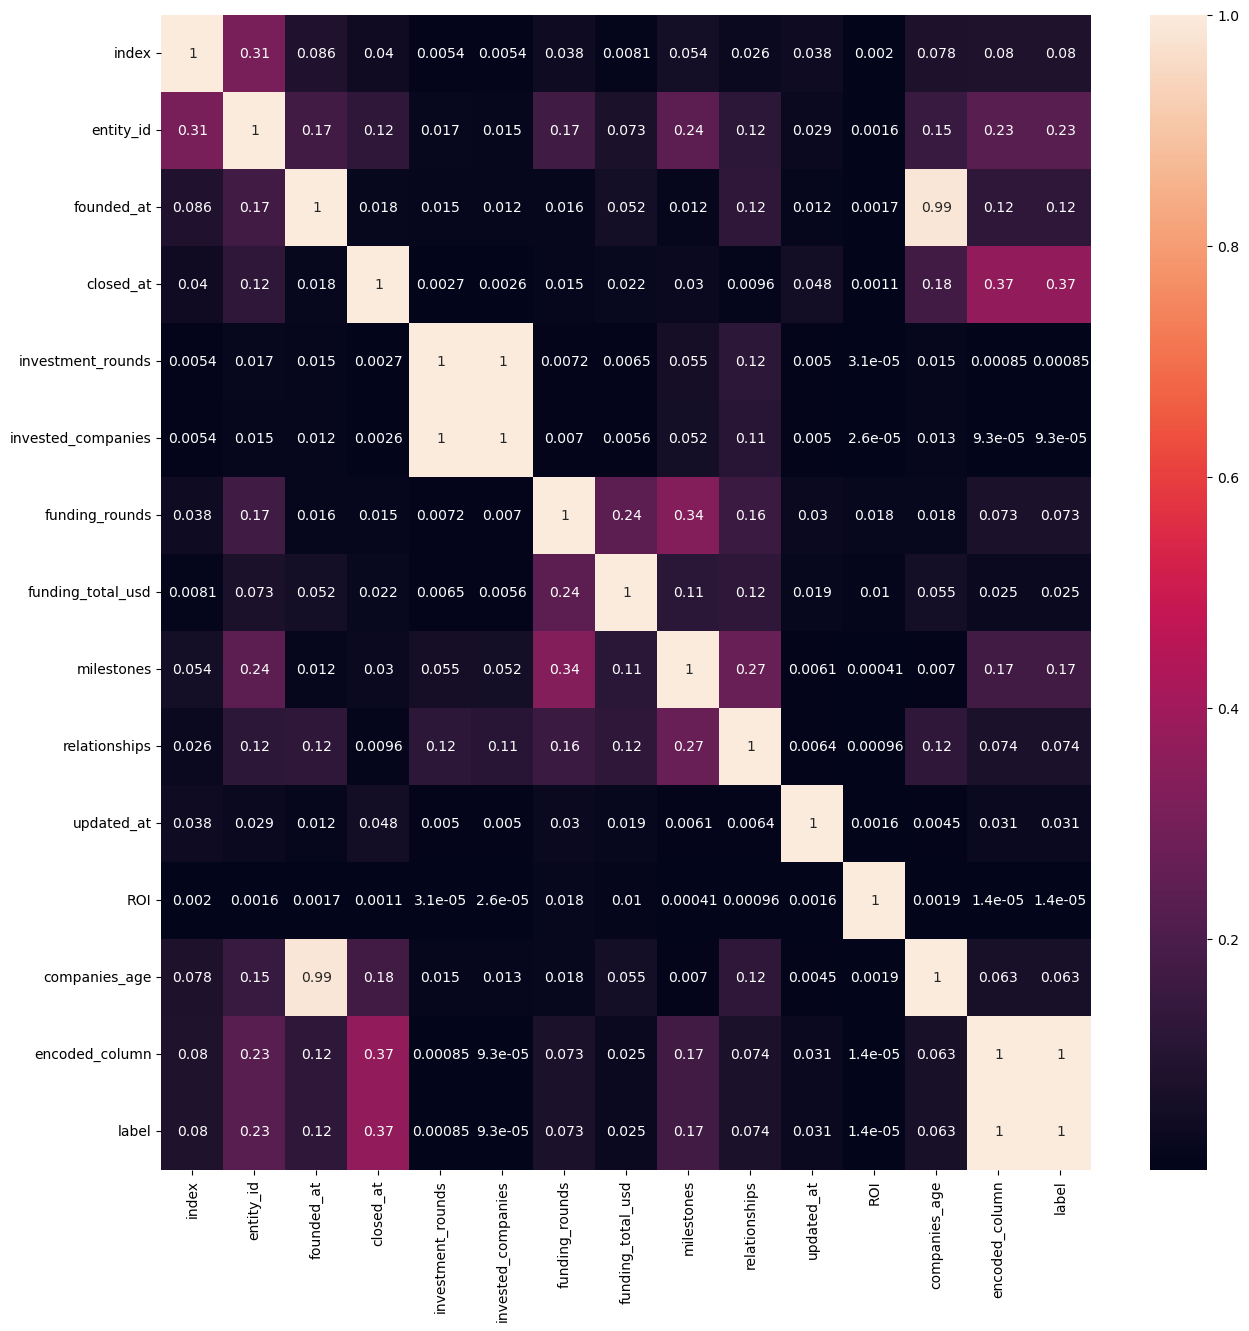

In [83]:
plt.figure(figsize = (15,15))
sns.heatmap(df_corr, annot = True)
plt.show()

Founted at and Companies age columns are also highly correlated columns.

### Normal Distribution 

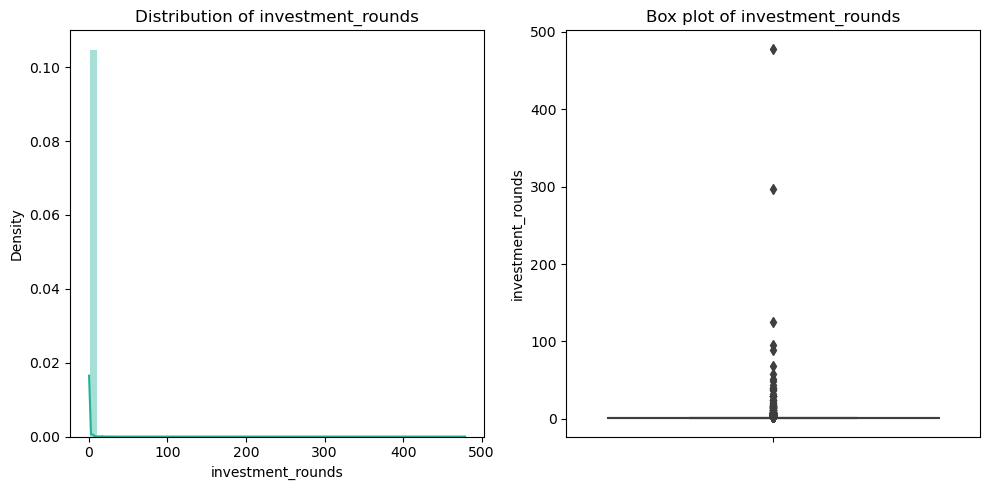

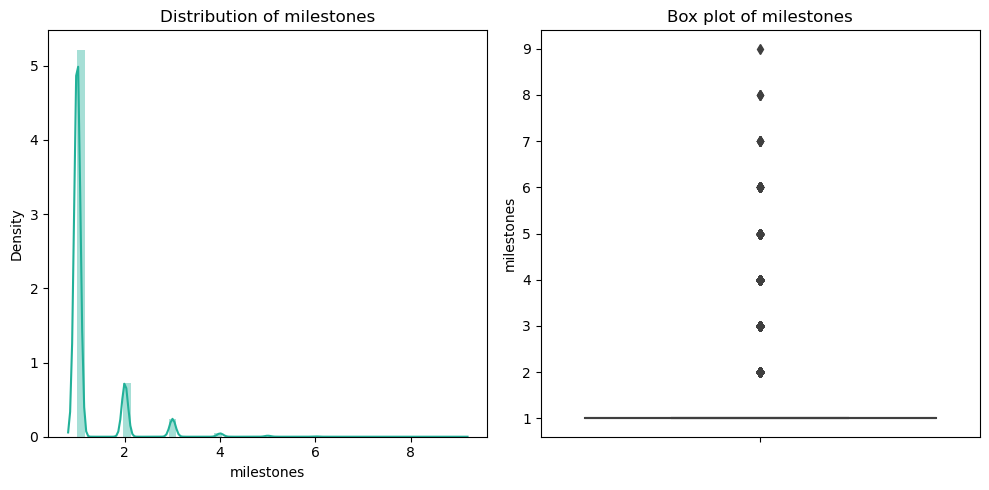

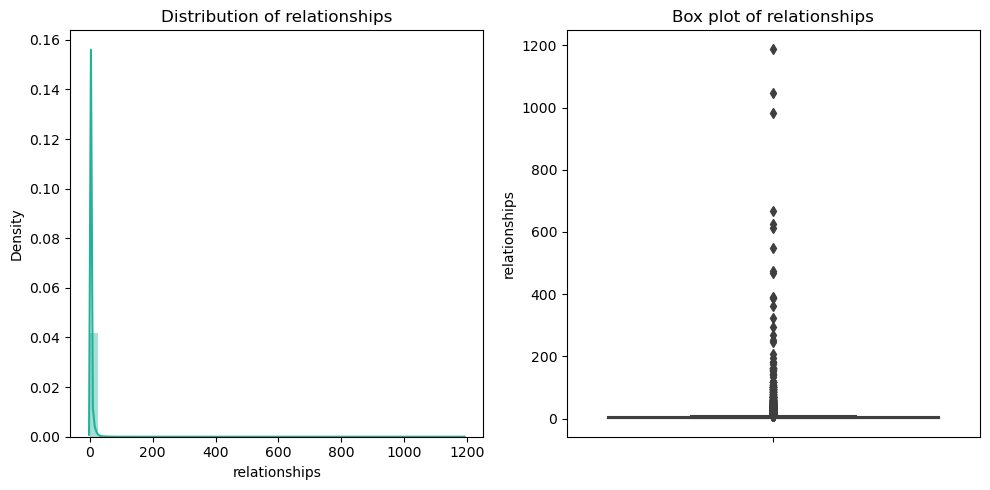

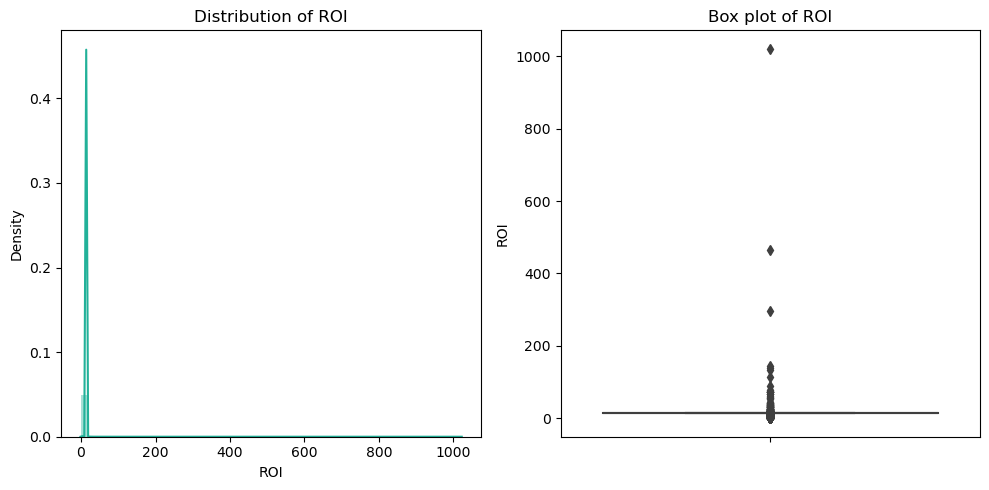

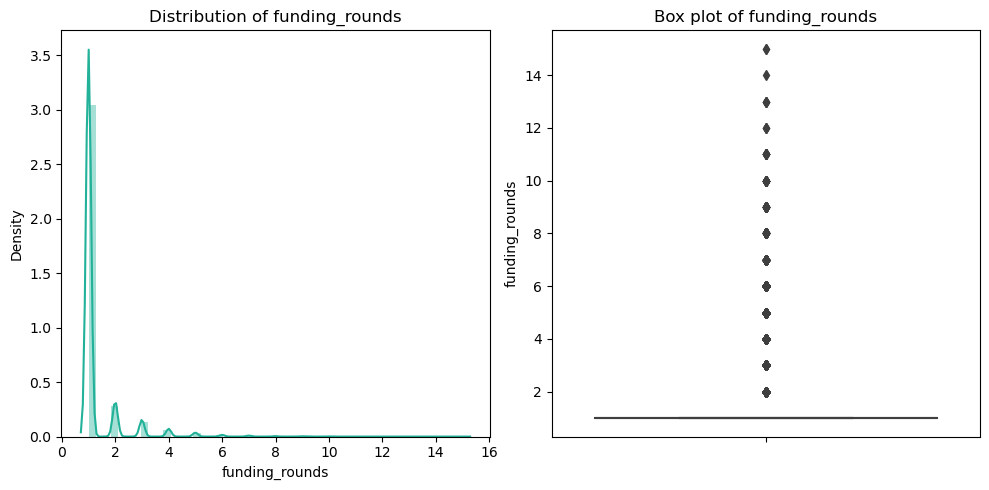

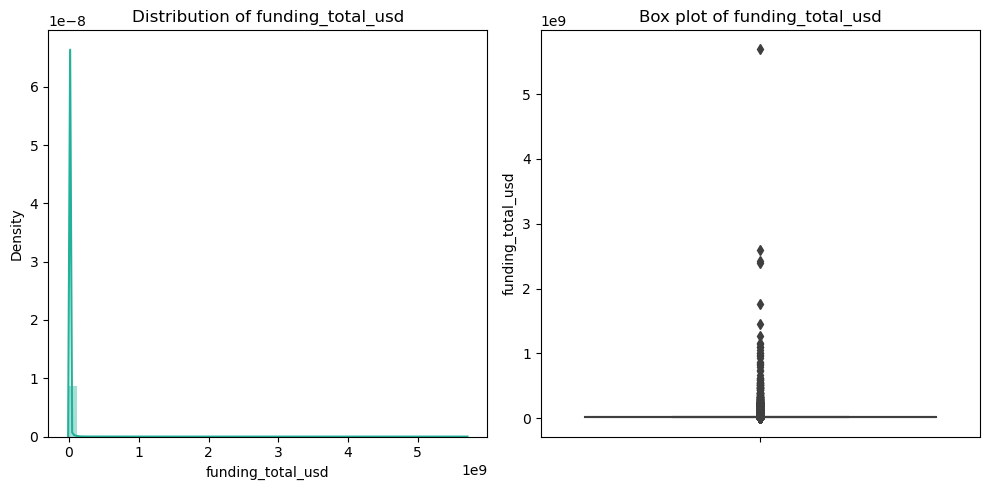

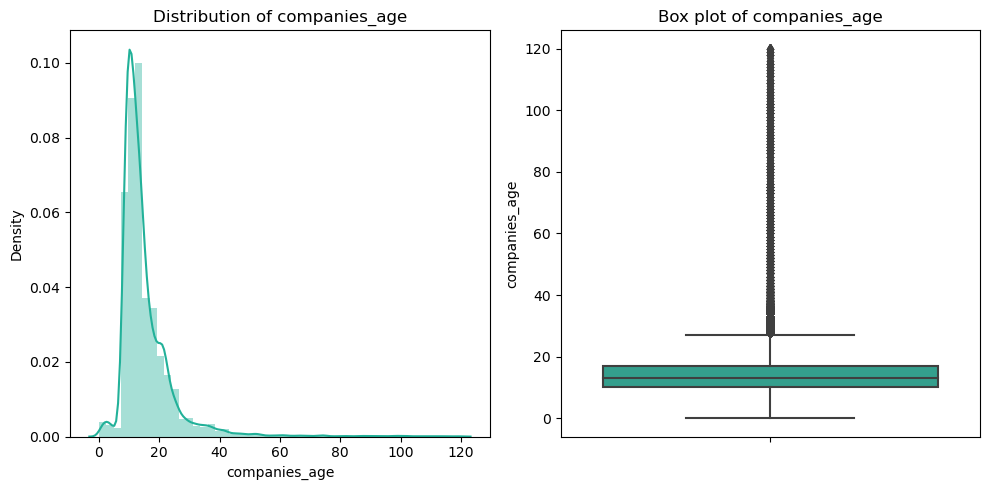

(64094, 20)


In [86]:
def check_outliers(x):
    global data
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(data[x],color='#22b199',ax=axes[0])
    sns.boxplot(y=data[x],color='#22b199',ax=axes[1])
    axes[0].set_title('Distribution of ' + x)
    axes[1].set_title('Box plot of '+ x)
    plt.tight_layout()
    plt.show()

for i in ['investment_rounds','milestones', 'relationships', 'ROI', 'funding_rounds' ,'funding_total_usd','companies_age']:
    check_outliers(i)
    
print(data.shape)

Dataset is not normally distributed.

Dataset is very much skewed

Dataset will also have many outliers

#### Before Removing Outliers:

In [103]:
data[['funding_total_usd','funding_rounds']].describe()

,funding_total_usd,funding_rounds
count,6.006900e+04,60069.000000
mean,1.242825e+07,1.160149
std,5.947882e+06,0.557468
min,2.910000e+02,1.000000
25%,1.100000e+07,1.000000
50%,1.581978e+07,1.000000
75%,1.581978e+07,1.000000
max,1.704069e+07,15.000000


In [99]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

In [100]:
high = (q3.funding_total_usd + (1.5 * iqr.funding_total_usd))
print(high)

index = np.where(data['funding_total_usd'] > high)
print(index)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

17049455.46631492
(array([    0,     7,    10, ..., 64031, 64065, 64078], dtype=int64),)
(60069, 20)


,level_0,index,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,...,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age,encoded_column,label
0,1,5,10002,Synergie Media,advertising,operating,2007,2021.0,MAR,1.0,...,1.0,1.581978e+07,1.0,2.00000,24,6,14.41045,14.0,3,3
1,2,6,10003,Green Basti Ecosystems,cleantech,operating,2008,2021.0,IND,1.0,...,1.0,1.581978e+07,1.0,4.43465,24,22,14.41045,13.0,3,3
2,3,12,10009,dimension5 labs,advertising,operating,2008,2021.0,USA,1.0,...,1.0,1.581978e+07,1.0,2.00000,24,21,14.41045,13.0,3,3
3,4,13,1001,FriendFeed,web,acquired,2007,2021.0,USA,1.0,...,1.0,5.000000e+06,3.0,14.00000,01,13,9.50000,14.0,0,0
4,5,15,10011,PoetryVisualized.com,games_video,operating,2008,2021.0,USA,1.0,...,1.0,1.581978e+07,1.0,3.00000,24,3,14.41045,13.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60064,64089,196548,99940,Webgility,ecommerce,operating,2007,2021.0,USA,1.0,...,1.0,1.581978e+07,2.0,5.00000,06,13,14.41045,14.0,3,3
60065,64090,196549,9995,FohBoh,public_relations,operating,2007,2021.0,USA,1.0,...,1.0,7.500000e+05,1.0,14.00000,24,28,14.41045,14.0,3,3
60066,64091,196550,9996,CSC,consulting,operating,1959,2021.0,USA,1.0,...,1.0,1.581978e+07,3.0,44.00000,24,28,14.41045,62.0,3,3
60067,64092,196551,9997,Top-candidate,search,operating,2008,2021.0,USA,1.0,...,1.0,1.581978e+07,1.0,1.00000,24,28,14.41045,13.0,3,3


In [110]:
high_fu = (q3.funding_rounds + (1.5 * iqr.funding_rounds))
print(high_fu)

index_fu = np.where(data['funding_rounds'] > high)
print(index_fu)

data = data.drop(data.index[index_fu])
print(data.shape)

data.reset_index()

1.0
(array([], dtype=int64),)
(60069, 20)


,level_0,index,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,...,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age,encoded_column,label
0,1,5,10002,Synergie Media,advertising,operating,2007,2021.0,MAR,1.0,...,1.0,1.581978e+07,1.0,2.00000,24,6,14.41045,14.0,3,3
1,2,6,10003,Green Basti Ecosystems,cleantech,operating,2008,2021.0,IND,1.0,...,1.0,1.581978e+07,1.0,4.43465,24,22,14.41045,13.0,3,3
2,3,12,10009,dimension5 labs,advertising,operating,2008,2021.0,USA,1.0,...,1.0,1.581978e+07,1.0,2.00000,24,21,14.41045,13.0,3,3
3,4,13,1001,FriendFeed,web,acquired,2007,2021.0,USA,1.0,...,1.0,5.000000e+06,3.0,14.00000,01,13,9.50000,14.0,0,0
4,5,15,10011,PoetryVisualized.com,games_video,operating,2008,2021.0,USA,1.0,...,1.0,1.581978e+07,1.0,3.00000,24,3,14.41045,13.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60064,64089,196548,99940,Webgility,ecommerce,operating,2007,2021.0,USA,1.0,...,1.0,1.581978e+07,2.0,5.00000,06,13,14.41045,14.0,3,3
60065,64090,196549,9995,FohBoh,public_relations,operating,2007,2021.0,USA,1.0,...,1.0,7.500000e+05,1.0,14.00000,24,28,14.41045,14.0,3,3
60066,64091,196550,9996,CSC,consulting,operating,1959,2021.0,USA,1.0,...,1.0,1.581978e+07,3.0,44.00000,24,28,14.41045,62.0,3,3
60067,64092,196551,9997,Top-candidate,search,operating,2008,2021.0,USA,1.0,...,1.0,1.581978e+07,1.0,1.00000,24,28,14.41045,13.0,3,3


#### After removing outliers

<AxesSubplot:xlabel='funding_total_usd'>

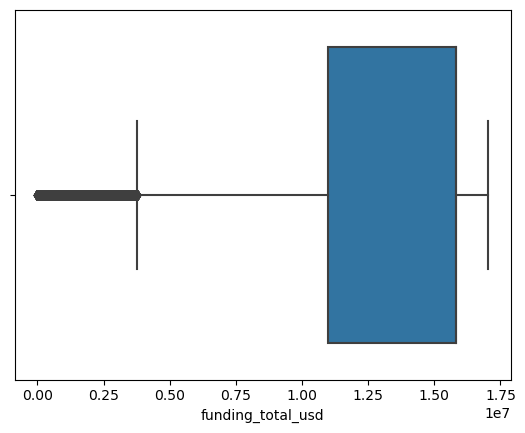

In [111]:
sns.boxplot(data['funding_total_usd'])

<AxesSubplot:xlabel='funding_rounds'>

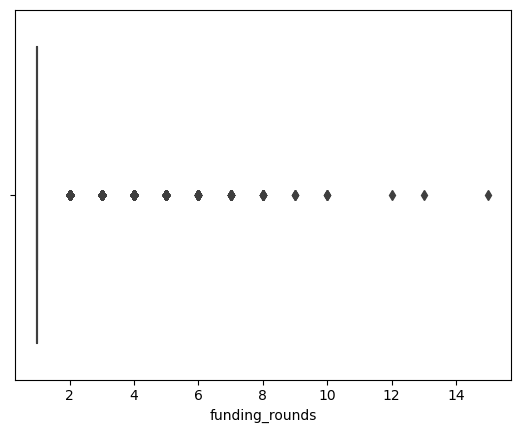

In [112]:
sns.boxplot(data['funding_rounds'])